<h4>Convoluted Neural Networks (CNNs): MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

c:\Users\cochr\OneDrive\Coding_and_DS\Int-Elligence Internship November 2025\Code\Data-Science\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


<h4>Data Loading + EDA

In [2]:
# Comes directly from the TensorFlow library:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# EDA:

In [5]:
# Data sizes and types:
print("Training data:")
print(f"x_train shape and type: {X_train.shape} {X_train.dtype}")
print(f"y_train shape and type: {y_train.shape} {y_train.dtype}")
print("\nTest data:")
print(f"x_test shape and type: {X_test.shape} {X_test.dtype}")
print(f"y_test shape and type: {y_test.shape} {y_test.dtype}")

Training data:
x_train shape and type: (60000, 28, 28) uint8
y_train shape and type: (60000,) uint8

Test data:
x_test shape and type: (10000, 28, 28) uint8
y_test shape and type: (10000,) uint8


In [6]:
# Are any of the points NaN?
np.isnan(X_train).sum(), np.isnan(y_train).sum()

(np.int64(0), np.int64(0))

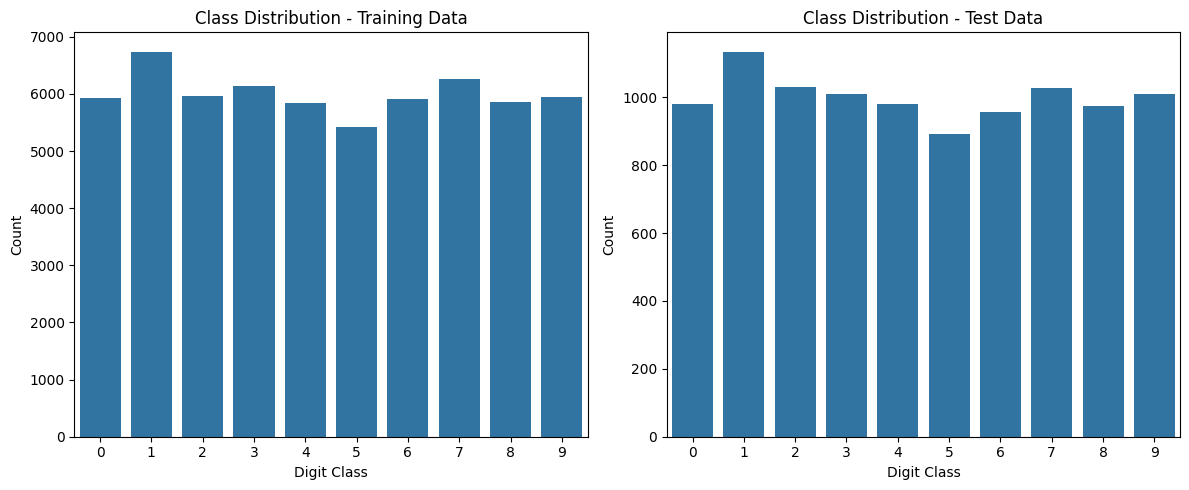

In [7]:
# Class distribution of y_train (y_test not as important to be balanced, but may be useful to check):
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution - Training Data')
plt.xlabel('Digit Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Class Distribution - Test Data')
plt.xlabel('Digit Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visually, they both seem to have an fairly equal distribution of classes.

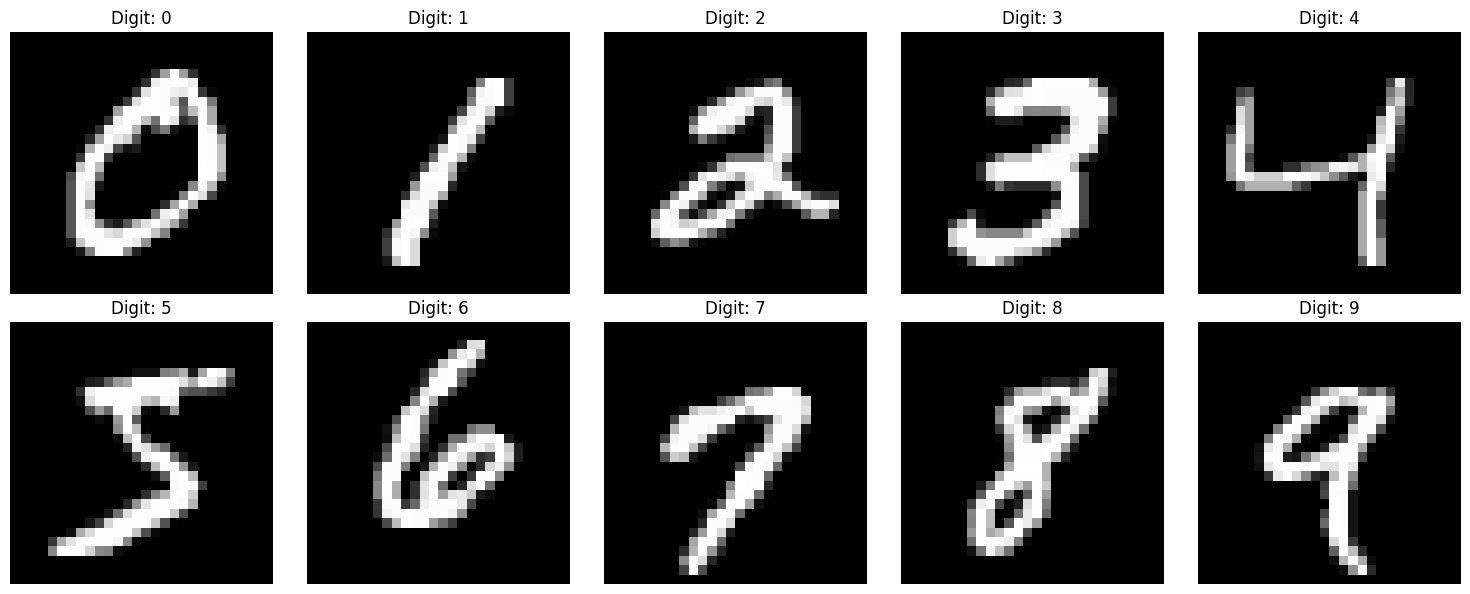

In [8]:
# Visual inspection of an image from each possible class in the training data:
plt.figure(figsize=(15, 6))

# Get unique classes and find first occurrence of each
unique_classes = np.unique(y_train)

for i, digit_class in enumerate(unique_classes):
    # Find first occurrence of this class
    first_index = np.where(y_train == digit_class)[0][0]
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[first_index], cmap='gray')
    plt.title(f'Digit: {digit_class}')
    plt.axis('off')

plt.tight_layout()
plt.show()

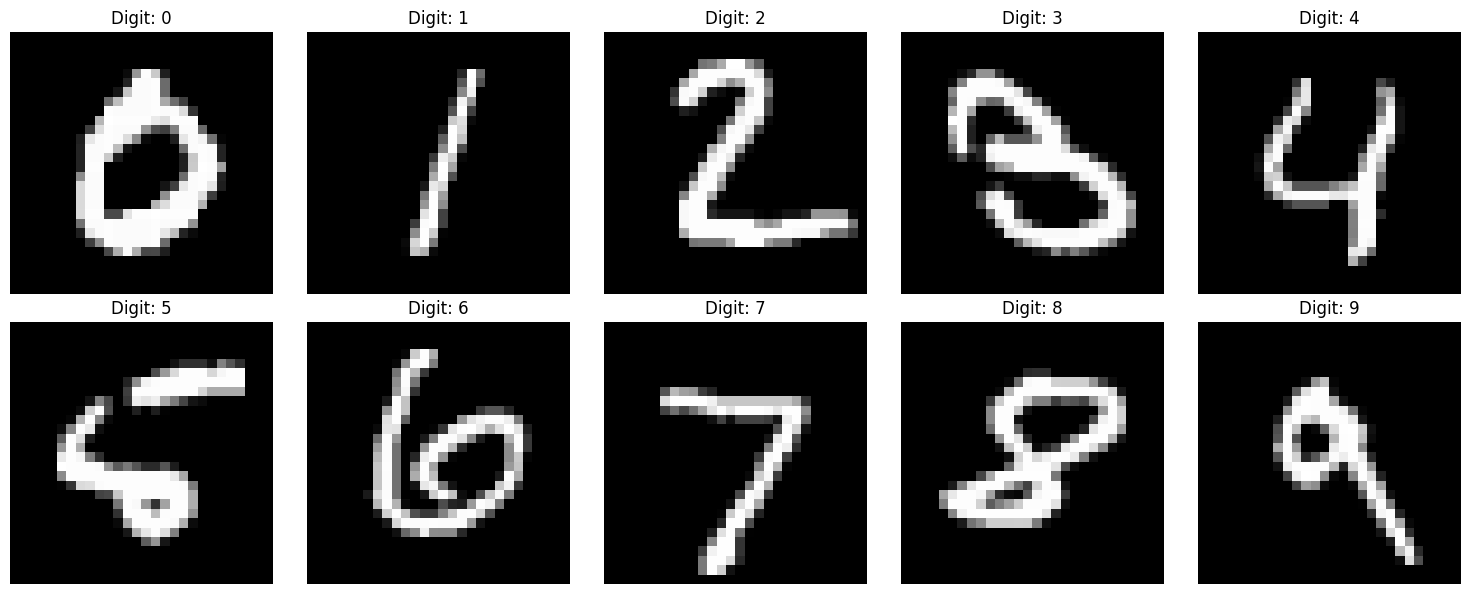

In [9]:
# Visual inspection of an image from each possible class in the test data:
plt.figure(figsize=(15, 6))

# Get unique classes and find first occurrence of each
unique_classes = np.unique(y_test)

for i, digit_class in enumerate(unique_classes):
    # Find first occurrence of this class
    first_index = np.where(y_test == digit_class)[0][0]
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[first_index], cmap='gray')
    plt.title(f'Digit: {digit_class}')
    plt.axis('off')

plt.tight_layout()
plt.show()

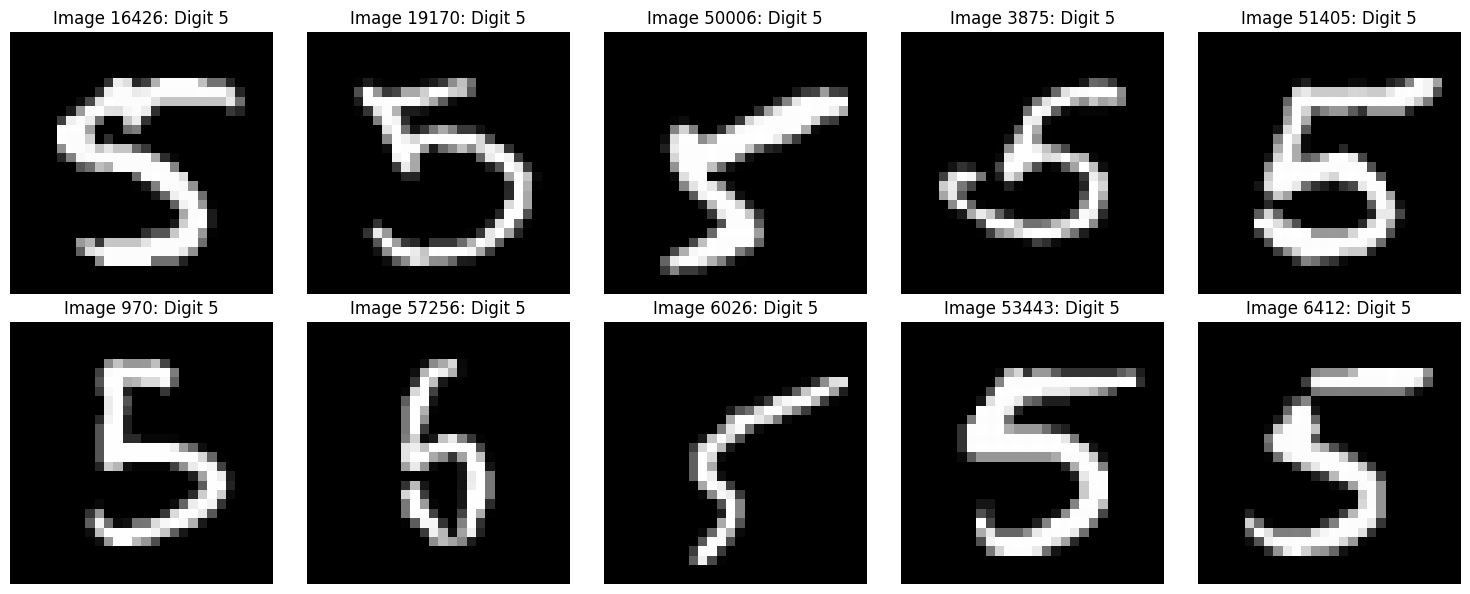

In [10]:
# Plot a random selection of 10 images of the class '5' from the training data (data quality assessment)
plt.figure(figsize=(15, 6))

# Find all indices where y_train equals 5
class_5_indices = np.where(y_train == 5)[0]

# Randomly select 10 indices from those that contain digit 5
random_indices = np.random.choice(class_5_indices, size=10, replace=False)

# Plot the 10 random images
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f'Image {idx}: Digit {y_train[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# None of the images so far have had an incorrect label or have been illegible.

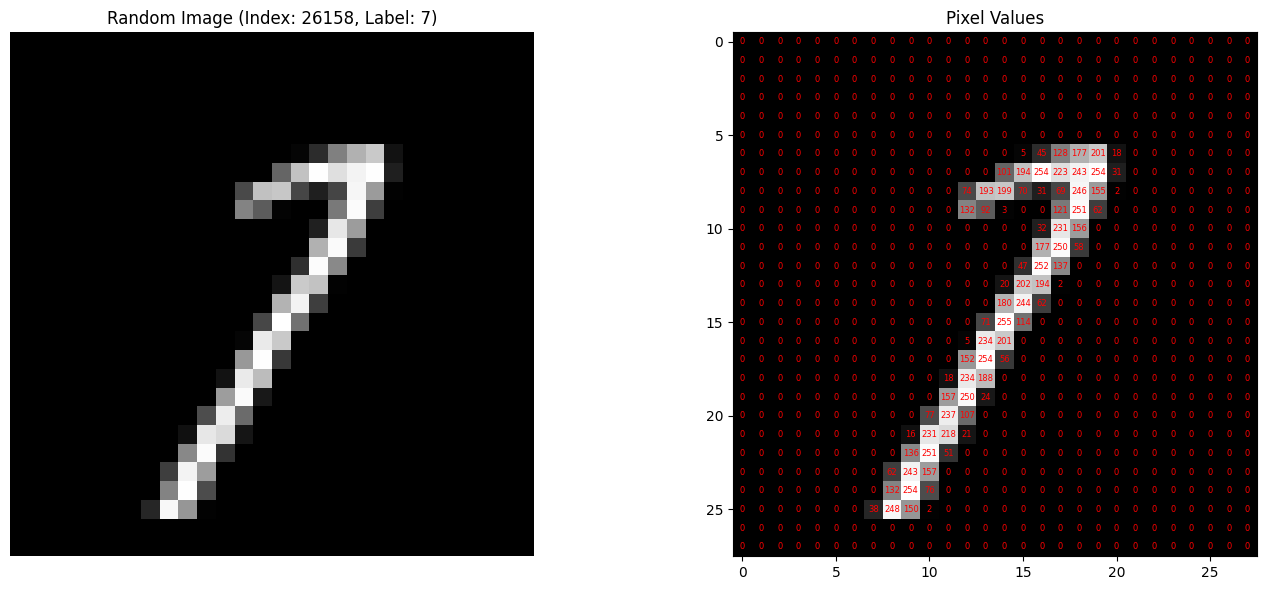

Image shape: (28, 28)
Pixel value range: 0 - 255
Data type: uint8


In [11]:
# Viewing a pixel value matrix of a random image to assess value sizes:

# Select a random image from training data
random_idx = np.random.randint(0, len(X_train))
random_image = X_train[random_idx]

# Create figure with the image and pixel values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the image
ax1.imshow(random_image, cmap='gray')
ax1.set_title(f'Random Image (Index: {random_idx}, Label: {y_train[random_idx]})')
ax1.axis('off')

# Plot the pixel value matrix
im = ax2.imshow(random_image, cmap='gray')
ax2.set_title('Pixel Values')

# Add text annotations for each pixel value
for i in range(random_image.shape[0]):
    for j in range(random_image.shape[1]):
        text = ax2.text(j, i, random_image[i, j], 
                        ha="center", va="center", color="red", fontsize=6)

plt.tight_layout()
plt.show()

# Print some statistics about the pixel values
print(f"Image shape: {random_image.shape}")
print(f"Pixel value range: {random_image.min()} - {random_image.max()}")
print(f"Data type: {random_image.dtype}")

# Some of the pixels go from 0 - 253/254/252. In general, it looks like the max range is 0-255.

<h5>Data Preprocessing

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 1) Create a validation set from the training set to be used during training:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=13
)

# 2) Add a channel dimension (1 = grayscale, 3 = RGB). All the images are grayscale anyway:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 3) Normalise the pixel values + make sure dataype = float32:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# 4) Encode the labels:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test  = to_categorical(y_test)



# 5) Data augmentation (ImageDataGenerator):
    # Helps to combat overfirtting.
    # Introduces slight variablilities in newly generated training images.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( #If the augmentation is too agressive, early training can be dominated by 'distored' digits, causing poor predictions)
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
)
datagen.fit(X_train) #Apply only to the training set, not the validation (or test) set.

<h5>Building the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build CNN model
model = Sequential([
# First Convolutional Block
Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), #input shape = (h, w, channel)
BatchNormalization(), #Normalizes the layer activations per batch (helps to speed training)
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)), #Reduces spatial dimension by 2 (H x W -> H/2 x w/2). Reduces computation
Dropout(0.3),

# Second Convolutional Block
Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.3),

# Third Convolutional Block
Conv2D(256, (3, 3), activation='relu'),
BatchNormalization(),
Dropout(0.3),

# Flatten and Dense layers
Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"] #Don't just add 'precision and 'recall', make sure to do the tf imports)
)
# Display model summary
model.summary()

c:\Users\cochr\OneDrive\Coding_and_DS\Int-Elligence Internship November 2025\Code\Data-Science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,087,946 (4.15 MB)

 Trainable params: 1,086,026 (4.14 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

trained_model = model.fit(datagen.flow(X_train, y_train, batch_size=64, shuffle = True),
                          epochs=10,
                          validation_data=(X_val, y_val),
                          callbacks=[early_stopping])

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.8646 - loss: 0.4537 - precision: 0.8946 - recall: 0.8470 - val_accuracy: 0.9817 - val_loss: 0.0632 - val_precision: 0.9835 - val_recall: 0.9808
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9590 - loss: 0.1351 - precision: 0.9647 - recall: 0.9546 - val_accuracy: 0.9845 - val_loss: 0.0549 - val_precision: 0.9851 - val_recall: 0.9838
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9691 - loss: 0.0979 - precision: 0.9732 - recall: 0.9663 - val_accuracy: 0.9873 - val_loss: 0.0504 - val_precision: 0.9878 - val_recall: 0.9868
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9738 - loss: 0.0876 - precision: 0.9769 - recall: 0.9711 - val_accuracy: 0.9855 - val_loss: 0.0577 - val_precision: 0.9866 - val_recall: 0.9835
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9764 - loss: 0.0784 - precision: 0.9794 - recall: 0.9741 - val_accuracy: 0.9878 - va

In [15]:
# Make predictions:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1) #The index position of the max value is the class
y_true = np.argmax(y_test, axis=1) # ""

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [16]:
# Quick test (make sure labels are 'back')
print(y_true[0])
print(y_pred_class[0])

7
7


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



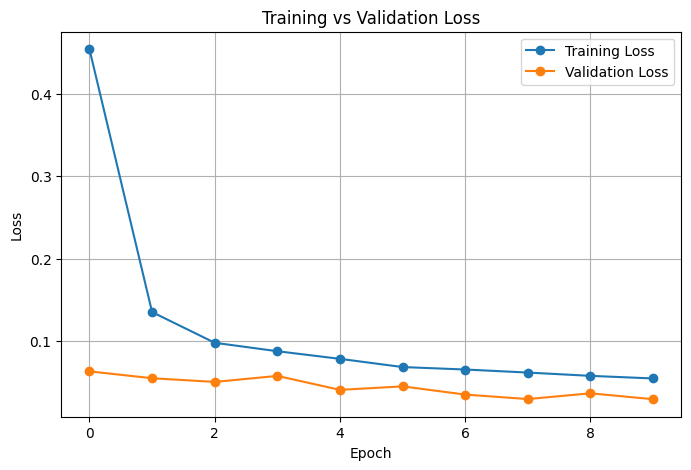

In [18]:
# Plot training & validation loss curves
history = trained_model.history

plt.figure(figsize=(8, 5))
plt.plot(history['loss'], marker='o', label='Training Loss')
plt.plot(history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# If we were getting overfitting, val_loss would start to trend up continuously whilst training loss trends down.

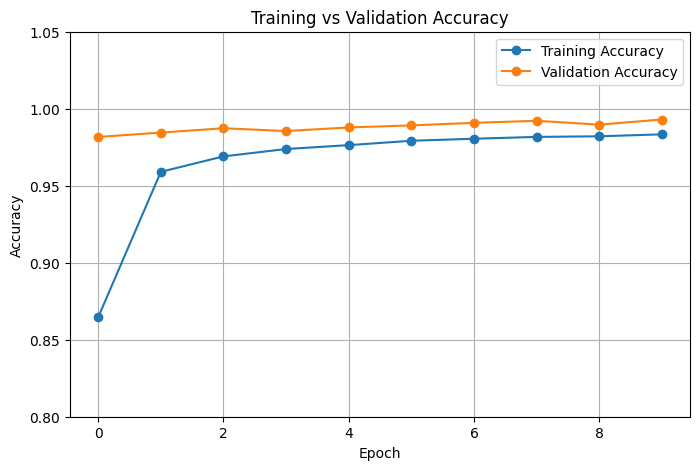

In [19]:
# Plot training & validation accuracy curves
plt.figure(figsize=(8, 5))
plt.plot(history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0.8,1.05)
plt.show()

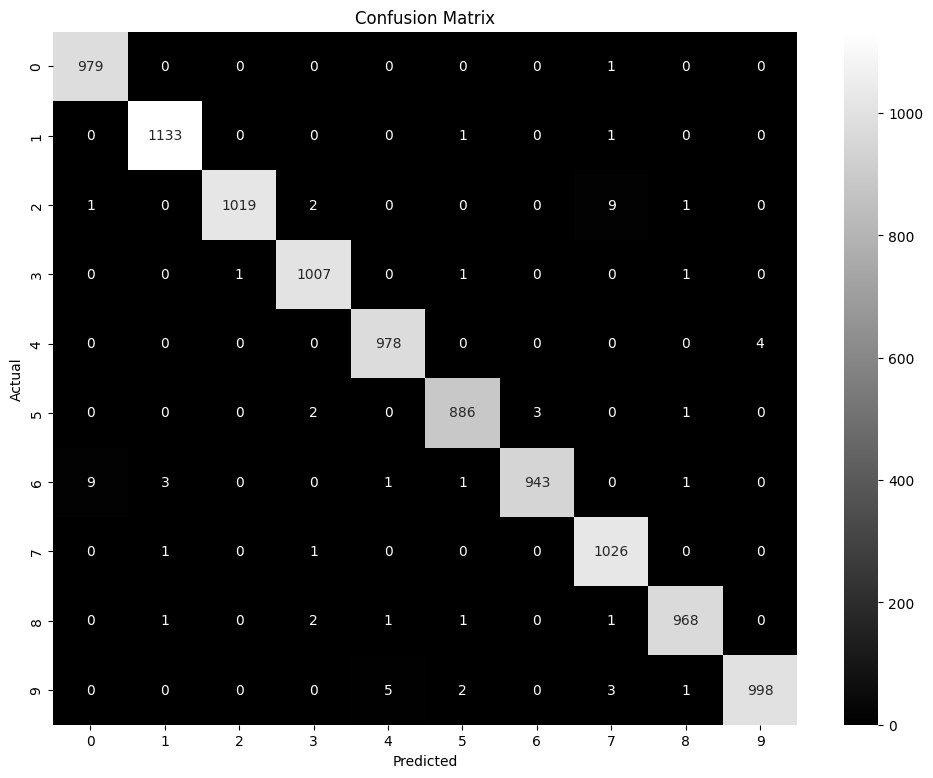

Diagonal (correct) counts: 9937
Off-diagonal (incorrect) counts: 63
Fraction correct: 0.9937 (99.37%)


In [28]:
# Confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# The more values that lie on the diagonal relative to the rest of the matrix the better.
diag = np.trace(cm)
total = cm.sum()
off_diag = total - diag

print(f"Diagonal (correct) counts: {diag}")
print(f"Off-diagonal (incorrect) counts: {off_diag}")
print(f"Fraction correct: {diag/total:.4f} ({diag/total*100:.2f}%)")

Number of missclassified images:63


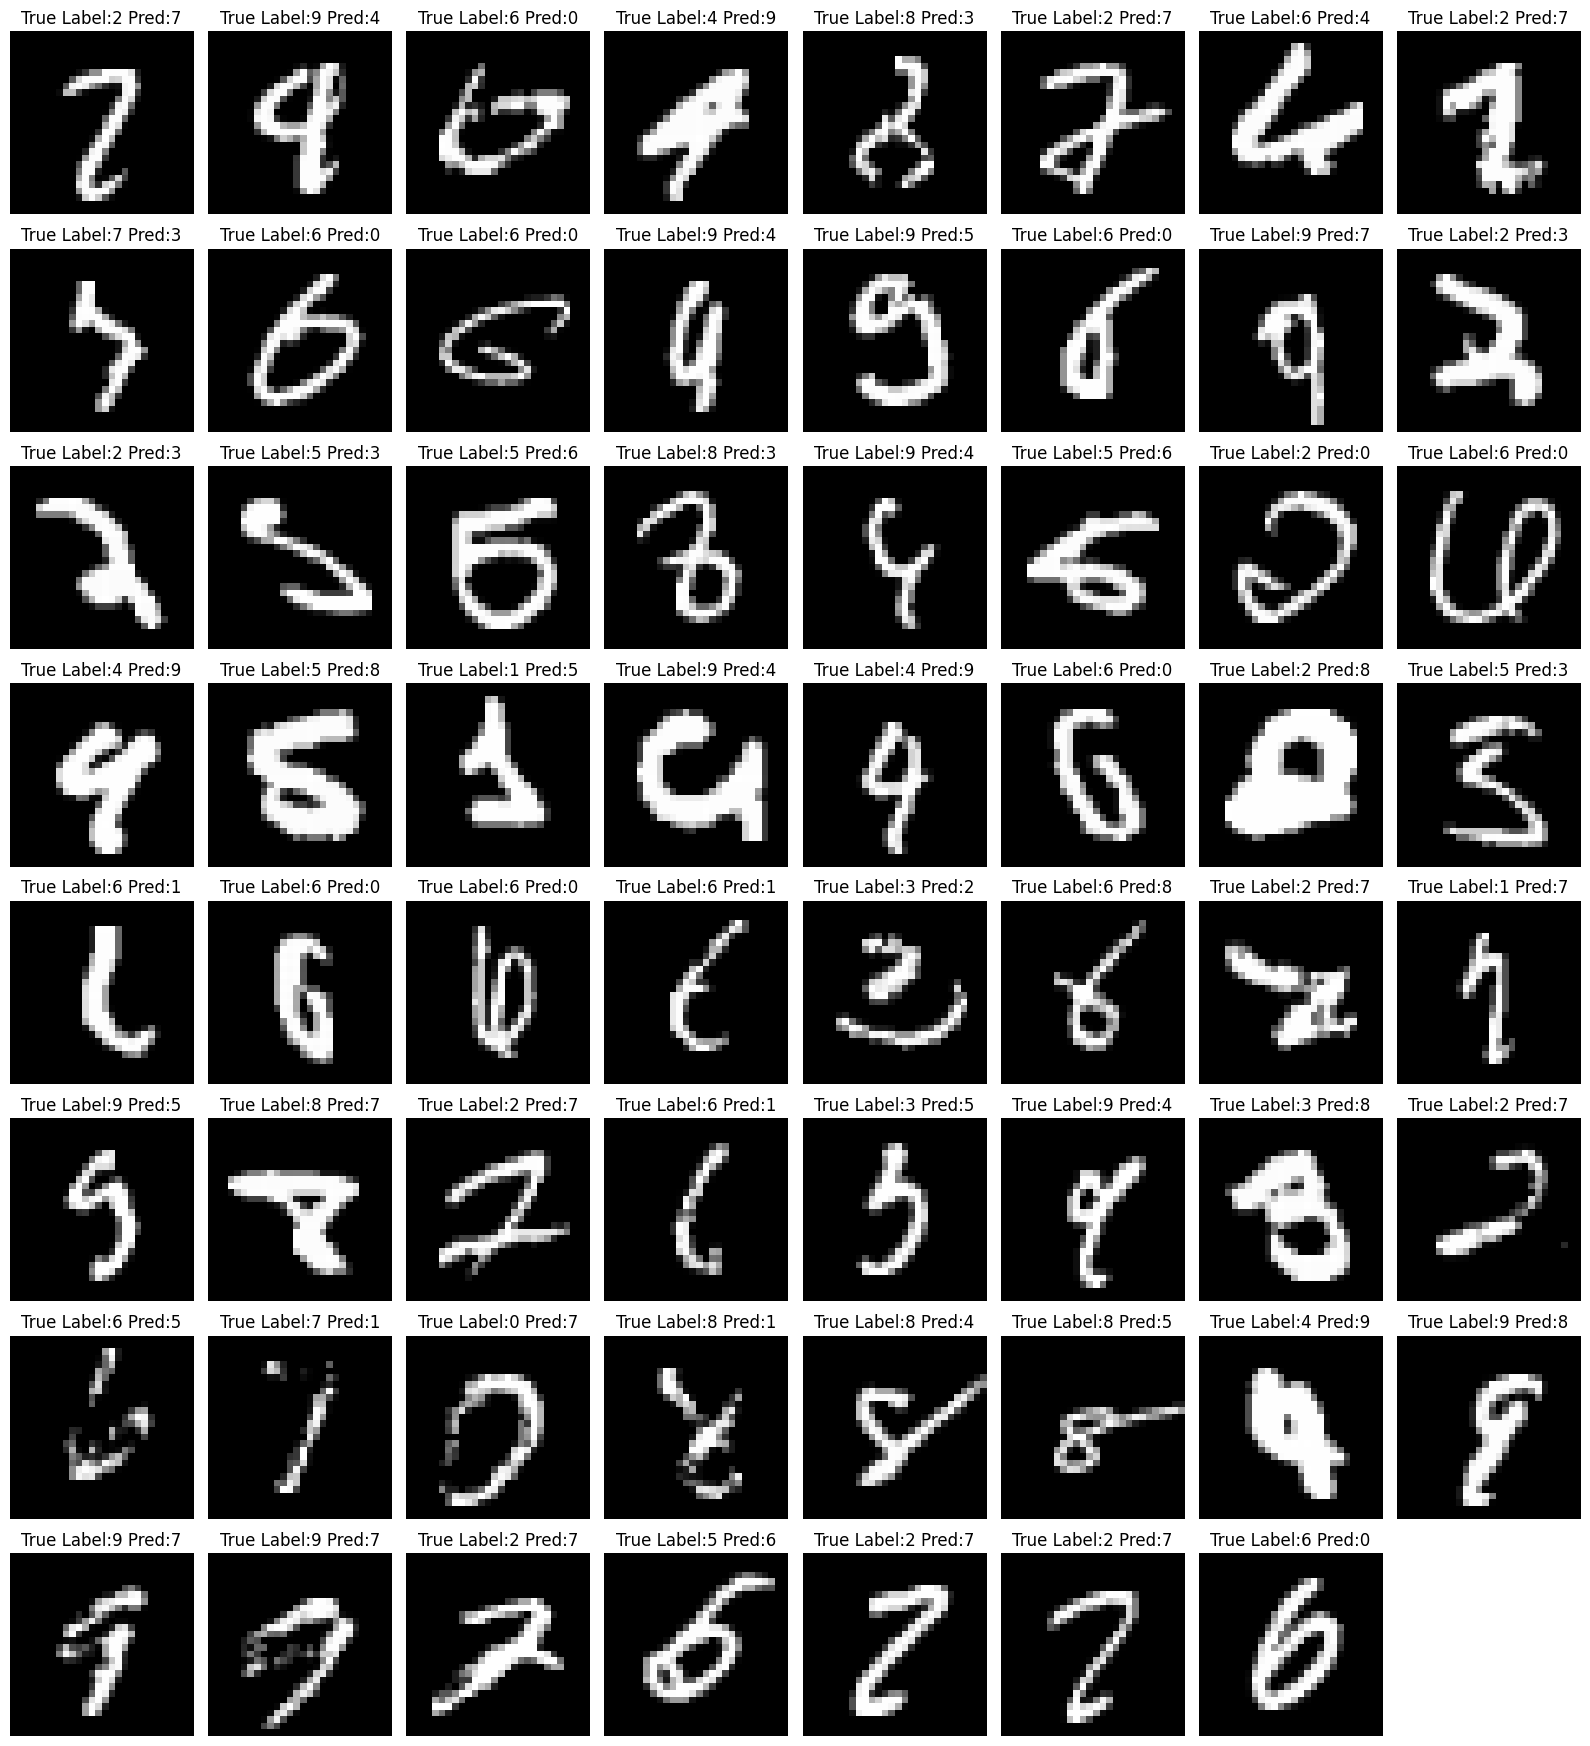

In [33]:
# Display misclassified test images
mis_idx = np.where(y_pred_class != y_true)[0]
n = len(mis_idx)

if n == 0:
    print("No misclassified images.")
else:
    print(f"Number of missclassified images:{n}")
    cols = 8
    rows = int(np.ceil(n / cols))
    plt.figure(figsize=(cols * 2, rows * 2.2))
    for i, idx in enumerate(mis_idx):
        ax = plt.subplot(rows, cols, i + 1)
        img = X_test[idx].squeeze()  # shape (28,28)
        plt.imshow(img, cmap='gray')
        plt.title(f"True Label:{y_true[idx]} Pred:{y_pred_class[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [34]:
# The majority of these are very ambiguous for a human to interpret e.g 2 and 7 mismatch, and 8 and 5 mismatch.

In [36]:
model.save('mnist_CNN_model_1.keras')

In [47]:
def evaluate_CNN_MNIST_model(model, X_test=X_test, y_test=y_test, class_labels=class_labels, history=None, show_plots=True, max_mis=64):
    """
    Evaluate a trained Keras CNN on MNIST-formatted arrays and optionally display plots.

    Parameters
    ----------
    model : keras.Model
        Trained Keras model to evaluate.
    X_test : numpy.ndarray, optional
        Test images array. Expected shape (n_samples, 28, 28, 1) and dtype float32 (pixel values scaled 0-1).
    y_test : numpy.ndarray, optional
        Test labels. Either one-hot encoded shape (n_samples, n_classes) or integer labels shape (n_samples,).
    class_labels : list of str, optional
        Names for each class used in the classification report and heatmap x/y tick labels.
    history : keras.callbacks.History or dict, optional
        Training history (History object or dict with keys like 'loss','val_loss','accuracy','val_accuracy').
        If provided, training/validation loss and accuracy plots will be shown.
    show_plots : bool, default True
        If True, show confusion matrix heatmap, misclassified images, and training curves (when history provided).
    max_mis : int, default 64
        Maximum number of misclassified images to display.

    Behavior
    --------
    - Computes model predictions and predicted class indices.
    - Converts one-hot y_test to integer labels automatically.
    - Prints a quick sanity check (first true/predicted label), full classification report,
      and confusion matrix statistics (correct, incorrect, fraction correct).
    - When show_plots is True:
      - Displays a confusion matrix heatmap (using seaborn).
      - Displays up to max_mis misclassified images in a grid (8 columns).
      - Displays training/validation loss and accuracy curves if history is provided.
    - Returns a dictionary with the report, confusion matrix and prediction arrays.

    Returns
    -------
    dict
        {
            'report': str,                 # classification_report text
            'confusion_matrix': ndarray,   # confusion matrix (n_classes x n_classes)
            'y_pred': ndarray,             # predicted probabilities (n_samples, n_classes)
            'y_pred_class': ndarray,       # predicted class indices (n_samples,)
            'y_true': ndarray,             # true class indices (n_samples,)
            'mis_indices': ndarray         # indices of misclassified samples in X_test
        }

    Notes
    -----
    - Requires sklearn.metrics.classification_report and confusion_matrix, matplotlib.pyplot and seaborn in the notebook.
    - Assumes class_labels length matches number of classes in predictions.
    - Designed for MNIST-style inputs but will work with other small image classification tasks if shapes/labels match.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)

    # True labels (handle one-hot)
    if y_test.ndim == 2 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test.copy()

    # Quick sanity print
    print(y_true[0])
    print(y_pred_class[0])

    # Classification report
    report = classification_report(y_true, y_pred_class, target_names=class_labels)
    print(report)

    # Confusion matrix + stats + heatmap
    cm = confusion_matrix(y_true, y_pred_class)
    diag = np.trace(cm)
    total = cm.sum()
    off_diag = total - diag
    print(f"Diagonal (correct) counts: {diag}")
    print(f"Off-diagonal (incorrect) counts: {off_diag}")
    print(f"Fraction correct: {diag/total:.4f} ({diag/total*100:.2f}%)")

    if show_plots:
        plt.figure(figsize=(12, 9))
        sns.heatmap(cm, annot=True, fmt='d', cmap='gray', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    # Misclassified examples
    mis_idx = np.where(y_pred_class != y_true)[0]
    n = len(mis_idx)
    if n == 0:
        print("No misclassified images.")
    else:
        print(f"Number of misclassified images: {n}")
        disp_n = min(n, max_mis)
        cols = 8
        rows = int(np.ceil(disp_n / cols))
        if show_plots:
            plt.figure(figsize=(cols * 2, rows * 2.2))
            for i, idx in enumerate(mis_idx[:disp_n]):
                ax = plt.subplot(rows, cols, i + 1)
                img = X_test[idx].squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f"True:{y_true[idx]} Pred:{y_pred_class[idx]}")
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    # Optional training history plots (if provided)
    if history is not None:
        hist = history.history if hasattr(history, 'history') else history
        if 'loss' in hist and 'val_loss' in hist and show_plots:
            plt.figure(figsize=(8, 5))
            plt.plot(hist['loss'], marker='o', label='Training Loss')
            plt.plot(hist['val_loss'], marker='o', label='Validation Loss')
            plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training vs Validation Loss')
            plt.legend(); plt.grid(True); plt.show()
        if 'accuracy' in hist and 'val_accuracy' in hist and show_plots:
            plt.figure(figsize=(8, 5))
            plt.plot(hist['accuracy'], marker='o', label='Training Accuracy')
            plt.plot(hist['val_accuracy'], marker='o', label='Validation Accuracy')
            plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training vs Validation Accuracy')
            plt.legend(); plt.grid(True); plt.ylim(0.8,1.05); plt.show()

    return {
        'report': report,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_class': y_pred_class,
        'y_true': y_true,
        'mis_indices': mis_idx
    }

<h4>MISC
<h5>'Simpler' Model

Is there a model that can get similar performance to the first model but with less training 'computation' required?

In [38]:
# Go straight to model creation (data is already pre-processed):

simple_model = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), #input shape = (h, w, channel)
    BatchNormalization(), #Normalizes the layer activations per batch (helps to speed training)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)), #Reduces spatial dimension by 2 (H x W -> H/2 x w/2). Reduces computation
    Dropout(0.3),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Third Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Flatten and Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
simple_model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]
)

# Display model summary
simple_model.summary()

c:\Users\cochr\OneDrive\Coding_and_DS\Int-Elligence Internship November 2025\Code\Data-Science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,474 (650.29 KB)

 Trainable params: 165,962 (648.29 KB)

 Non-trainable params: 512 (2.00 KB)

In [39]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

simple_trained_model = simple_model.fit(datagen.flow(X_train, y_train, batch_size=64, shuffle = True),
                          epochs=10,
                          validation_data=(X_val, y_val),
                          callbacks=[early_stopping])

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.7706 - loss: 0.7436 - precision_1: 0.8627 - recall_1: 0.7052 - val_accuracy: 0.9783 - val_loss: 0.0728 - val_precision_1: 0.9822 - val_recall_1: 0.9757
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9382 - loss: 0.2112 - precision_1: 0.9534 - recall_1: 0.9252 - val_accuracy: 0.9825 - val_loss: 0.0554 - val_precision_1: 0.9848 - val_recall_1: 0.9815
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9575 - loss: 0.1459 - precision_1: 0.9664 - recall_1: 0.9505 - val_accuracy: 0.9843 - val_loss: 0.0532 - val_precision_1: 0.9861 - val_recall_1: 0.9837
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9655 - loss: 0.1194 - precision_1: 0.9713 - recall_1: 0.9602 - val_accuracy: 0.9873 - val_loss: 0.0481 - val_precision_1: 0.9886 - val_recall_1: 0.9868
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9700 - loss: 0.1076 - precision_1: 0.9753 - recall_1

In [49]:
simple_history = simple_trained_model.history

In [42]:
# Make predictions:
y_pred_simple = simple_model.predict(X_test)
y_pred_simple_class = np.argmax(y_pred_simple, axis=1) #The index position of the max value is the class
y_true = np.argmax(y_test, axis=1) # ""

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
7
7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Diagonal (correct) counts: 9922
Off-diagonal (incorrect) counts: 78
Fraction correct: 0.9922 (99.22%)


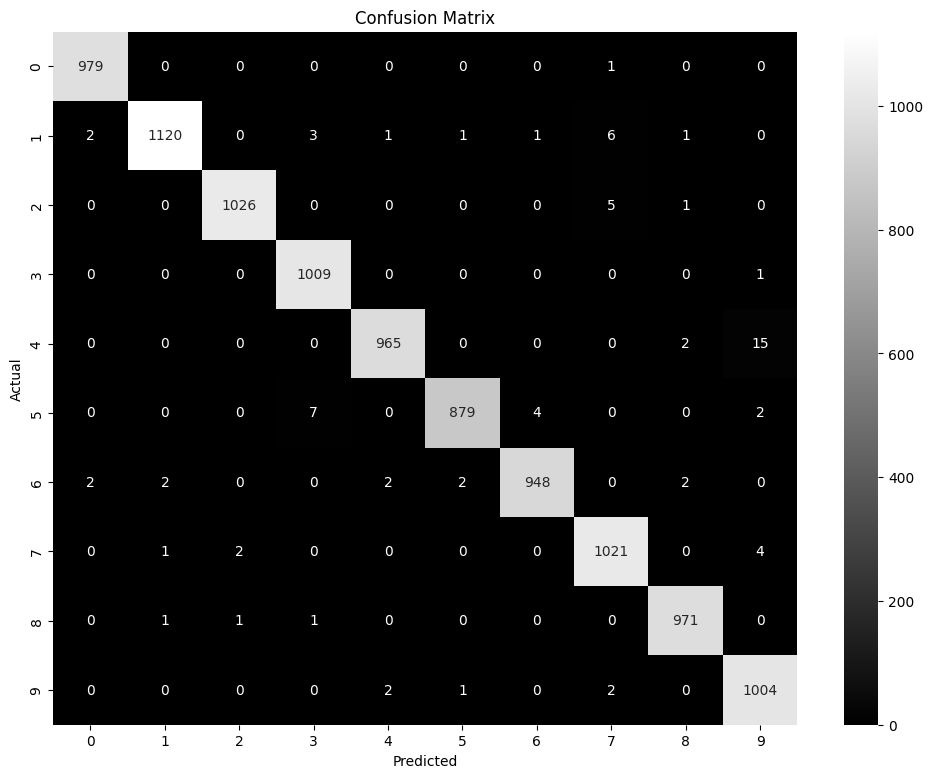

Number of misclassified images: 78


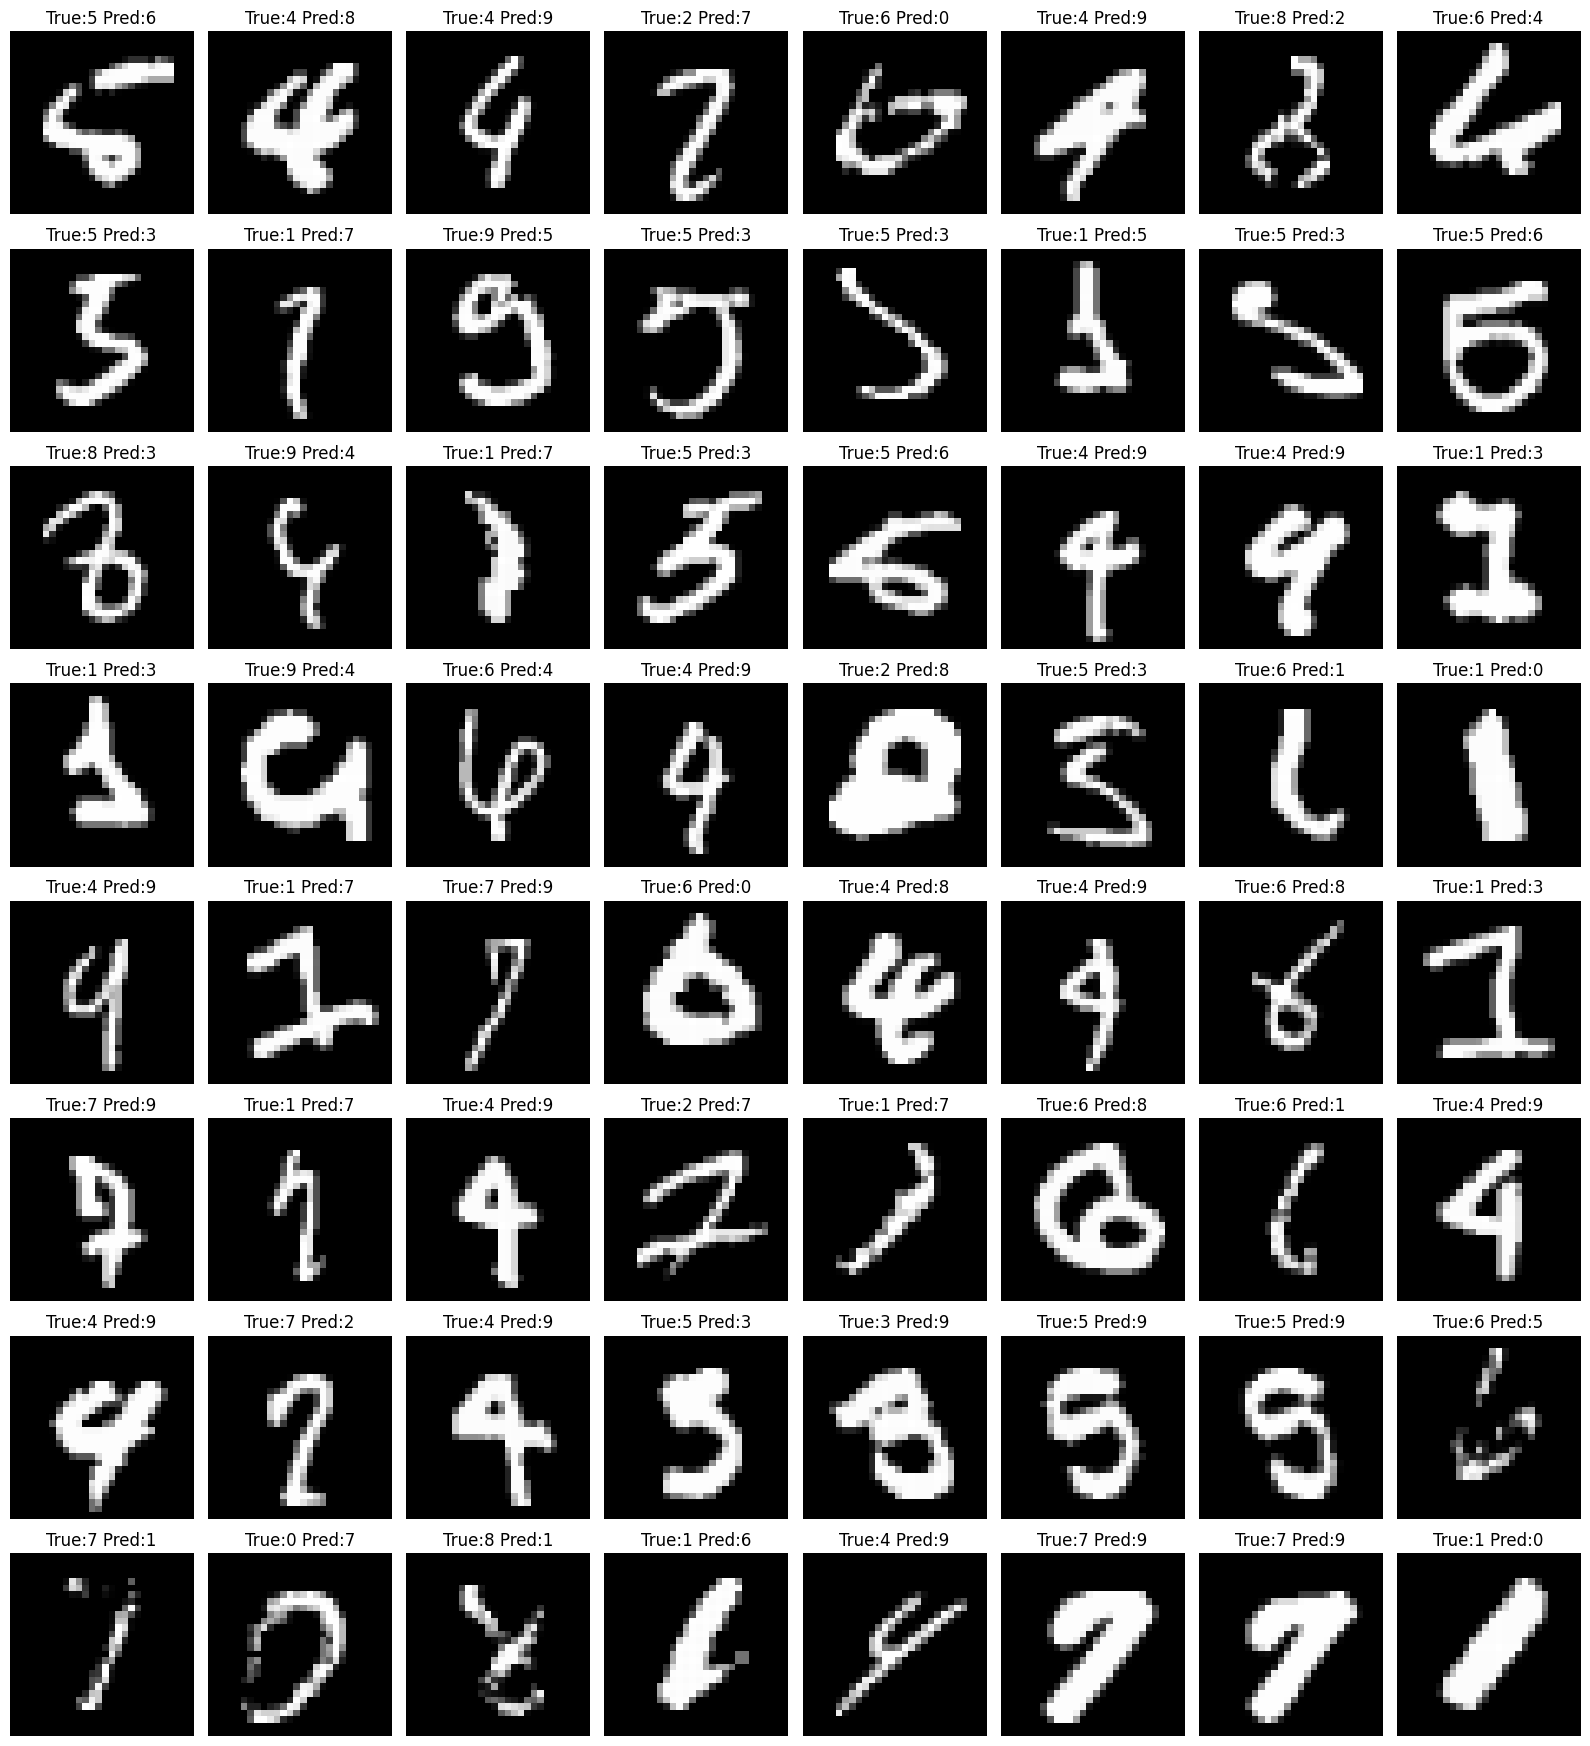

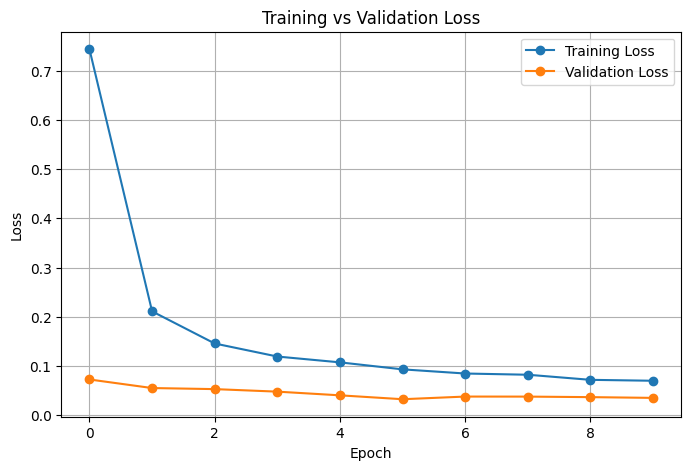

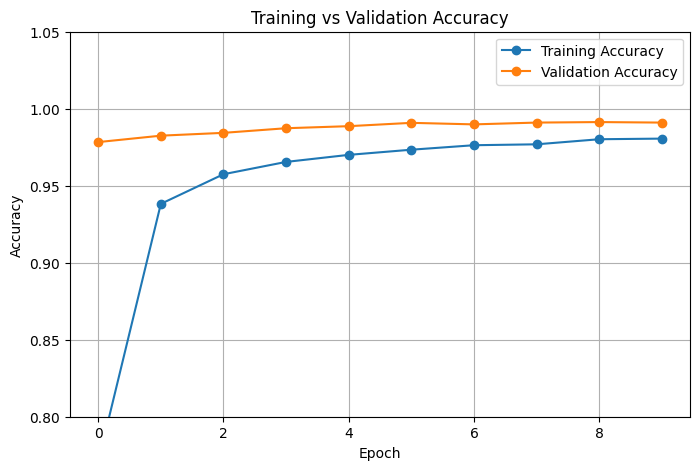

In [50]:
simple_model_eval = evaluate_CNN_MNIST_model(
    model = simple_model,
    X_test = X_test,
    y_test=y_test,
    class_labels=class_labels,
    history=simple_history,
)

In [51]:
# Even by modifying Convo2D layers to 64 density (overall parameter decrease of around 9x, we still get
# very good evaluation metrics)